## Anytime you modify `basic_fem.py`, you MUST restart runtime and run the following cells again

Go to this tab:  Runtime  > Restart runtime

### Load libraries
Run this cell first to load necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)
from drive.MyDrive.FEM505 import basic_fem as fem
from drive.MyDrive.FEM505 import utilities as uts

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Mounted at /content/drive


# TO DO 1:
We defined the loss function for training using our FEM module `basic_fem.py` in the next cell.

Provide comments for (a-e) shown below and explain in a few sentences the **purpose** of lines of code in the loss function. 


In [ ]:
def loss_function(img, U):
    """
    img: y_true
    U:   y_pred
    """
    # Finding the image size
    # Here the third channel is always 1.
    _,m,n,_ = img.shape
    # Working with TensorFlow objects, we must use the following command 
    # to find the size of data, i.e. the number of examples
    N = tf.shape(img)[0]

    # obtaining global K and F from our FEM module
    K,F = fem.get_K_and_F(m,n)

    # (a) comment:
    dom = img == -2
    bc  = img != -2

    # Changing data type for consistency
    img = tf.cast(img, dtype=tf.float64)
    U   = tf.cast(U,   dtype=tf.float64)

    # (b) comment:
    U = tf.where(bc, img, U) 

    # (c) comment:
    R = K @ tf.reshape(tf.transpose(U[:,:,:,0], perm=[1,2,0]), shape =(m*n,N)) - tf.repeat(tf.reshape(F, shape=(m*n,1)),N,axis=1)
    
    # (d) comment:
    R_red = tf.boolean_mask(tf.transpose(tf.reshape(R, shape=(m,n,N,1)), perm=[2,0,1,3]), dom)

    # (e) comment:
    mse_R_red = tf.reduce_mean(tf.reduce_sum(tf.square(R_red)))
    
    return mse_R_red


## The example that we want to solve using convolutional neural networks:

Here, we first solve it using our FEM module `basic_fem.py` to have a reference solution. 


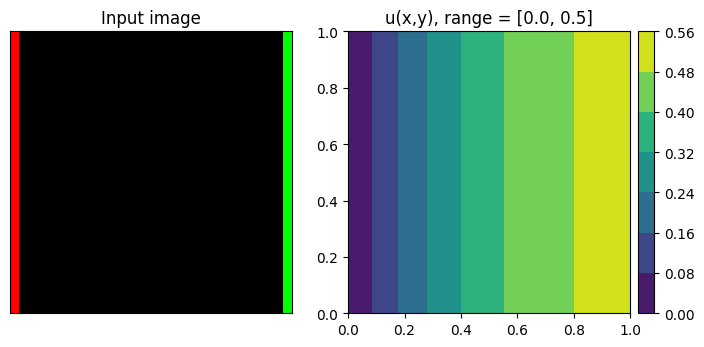

In [ ]:
m, n = 32, 32

# [bottom, top, left, right]
bc_value = [None, None, 0, .5]  # Do NOT change these boundary values for project

img = uts.make_inpt_image(m, bc_value)

# Solving with FEM
U = fem.solve(img)

# Plotting the results
uts.plot_results(img,U)

# TO DO 2:

1. Use `uts.LayerFillRandomNumber()` and the loss function defined above to build and compile a convolutional neural network (CNN) with the following architecture.

Click [here](https://drive.google.com/uc?export=view&id=1n0-u7rXGymZrKIwvrftmMOEZ9jzFDNkq) if results are not displayed.

![CNN](https://drive.google.com/uc?export=view&id=1n0-u7rXGymZrKIwvrftmMOEZ9jzFDNkq)

2.  Find proper values for `N`, `batch_size`, and `epochs` that result in an output training loss of less than `0.025`. Training should not take more than 30 minutes. 

3. Print the model summary and plot the loss vs epochs graph. 

4. Plot the solution obtained by the trained CNN. The solution should be reasonably close to the above solution obtained by FEM.

5. Include in your final pdf report: 
   - values of `N`, `batch_size`, `epochs`, and final training loss 
   - model summary,
   - loss vs epochs graph
   - final CNN solution 



## Data pre-procesing

In [ ]:
#-----------------------------------------
N = 3000   # The number of input images 
#-----------------------------------------

# img matrix repeated N times:
X_train = uts.repeat_one_image(uts.add_channel_to_one(img),N)

# We do not use actual labeled data (Y_trian) in this problem. 
# loss function takes Y_trian as the first entry during the training process. 
# By taking advantage of this, we use Y_train to impose boundary conditions
# into the FEM residual in our defined loss function. 
# Therefore, Y_trian is equivalent to X_trian.
# (Understanding these details is not necessary for doing your project.)
Y_train = uts.repeat_one_image(uts.add_channel_to_one(img),N)

print(X_train.shape)
print(Y_train.shape)
print('check if loss working :', loss_function(X_train,Y_train))

## Build CNN

## Compile

In [ ]:
# use optimizer ='Nadam'


## Train

## Print model summary

## Plot loss vs epochs

## Plot CNN solution

1/1 [==============================] - 0s 34ms/step


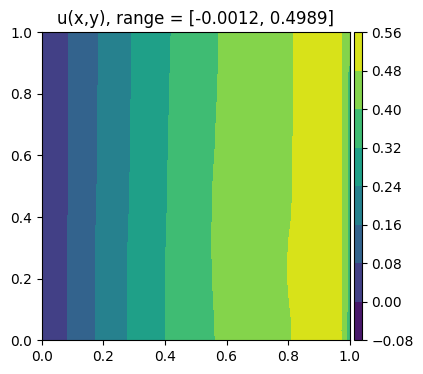

In [ ]:
CNN_output = model.predict(X_train[:1,:,:,:])[0,:,:,0]

uts.plot_u(CNN_output,img)